In [ ]:
# I/O
r_results = "../results/augur_sim.csv"

# R Results

In [ ]:
import pandas as pd

# Load the AUC results from the CSV file
auc_results = pd.read_csv(r_results)

print(auc_results)

   cell_type       auc
0  CellTypeC  0.971714
1  CellTypeB  0.889152
2  CellTypeA  0.596406


# Results from Augur Python Implementation

In [74]:
import pertpy as pt

adata = pt.dt.sc_sim_augur()
ag_rfc = pt.tl.Augur("random_forest_classifier")
loaded_data = ag_rfc.load(adata)

# predict with with select variance feature selection
v_adata, v_results = ag_rfc.predict(loaded_data, subsample_size=20, n_threads=16, augur_mode='velocity')
print(v_results["summary_metrics"])

! Set smaller span value in the case of a `segmentation fault` error.
! Set larger span in case of svddc or other near singularities error.


                  CellTypeA  CellTypeB  CellTypeC
mean_augur_score   0.611190   0.959773   0.998390
mean_auc           0.611190   0.959773   0.998390
mean_accuracy      0.557033   0.847363   0.952747
mean_precision     0.581258   0.905384   0.962246
mean_f1            0.461279   0.833915   0.951805
mean_recall        0.459206   0.814444   0.953968


# Testing for velocity 

   cell_type       auc
0  CellTypeC  0.971714
1  CellTypeB  0.889152
2  CellTypeA  0.596406
! Set smaller span value in the case of a `segmentation fault` error.
! Set larger span in case of svddc or other near singularities error.


                  CellTypeA  CellTypeB  CellTypeC
mean_augur_score   0.611190   0.959773   0.998390
mean_auc           0.611190   0.959773   0.998390
mean_accuracy      0.557033   0.847363   0.952747
mean_precision     0.581258   0.905384   0.962246
mean_f1            0.461279   0.833915   0.951805
mean_recall        0.459206   0.814444   0.953968
[0.         0.01111111 0.02222222 0.03333333 0.04444444 0.05555556
 0.06666667 0.07777778 0.08888889 0.1        0.11111111 0.12222222
 0.13333333 0.14444444 0.15555556 0.16666667 0.17777778 0.18888889
 0.2        0.21111111 0.22222222 0.23333333 0.24444444 0.25555556
 0.26666667 0.27777778 0.28888889 0.3        0.31111111 0.32222222
 0.33333333 0.34444444 0.35555556 0.36666667 0.37777778 0.38888889
 0.4        0.41111111 0.42222222 0.43333333 0.44444444 0.45555556
 0.46666667 0.47777778 0.48888889 0.5        0.51111111 0.52222222
 0.53333333 0.54444444 0.55555556 0.56666667 0.57777778 0.58888889
 0.6        0.61111111 0.62222222 0.63333333 0.

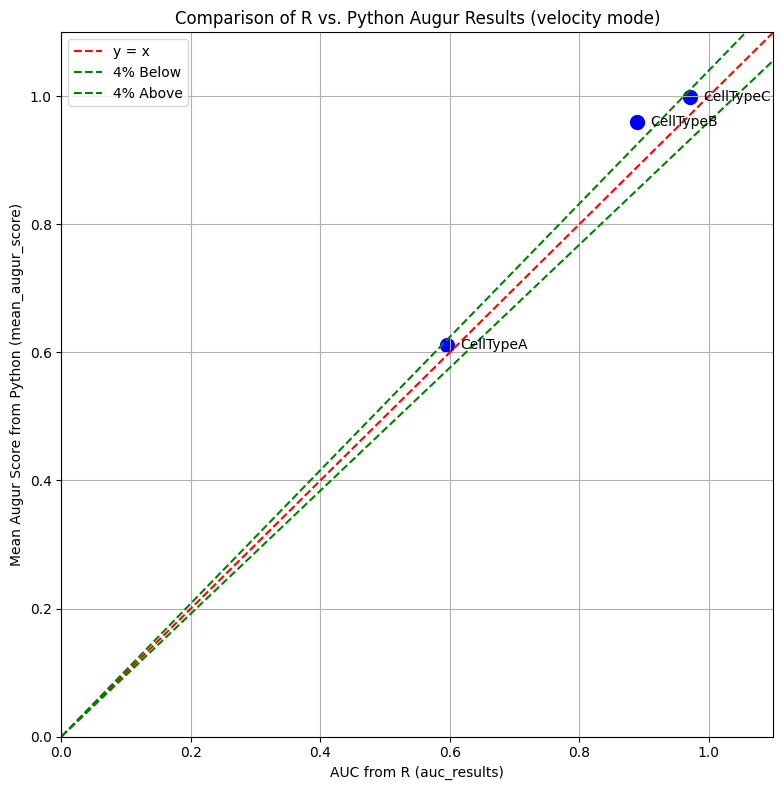

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pertpy as pt

# 1. Load the R-based AUC results (CSV)
file_path = "data/augur_R_auc_results_velocity.csv"  # TODO: what is this?
auc_results = pd.read_csv(file_path)  # columns: [cell_type, auc]

print(auc_results)

# 2. Load & predict with Python-based Augur
adata = pt.dt.sc_sim_augur()
ag_rfc = pt.tl.Augur("random_forest_classifier")
loaded_data = ag_rfc.load(adata)

v_adata, v_results = ag_rfc.predict(
    loaded_data,
    subsample_size=20,
    n_threads=16,
    augur_mode='velocity'
)
print(v_results["summary_metrics"])

# 3. Extract Python mean_augur_score
summary_metrics = v_results["summary_metrics"]
py_scores = summary_metrics.loc["mean_augur_score"]  # row is "mean_augur_score"
py_scores_df = py_scores.reset_index()
py_scores_df.columns = ["cell_type", "python_score"]

# 4. Merge with R results by cell_type
merged_df = pd.merge(auc_results, py_scores_df, on="cell_type")

# 5. Plot the points
plt.figure(figsize=(8, 8))

plt.scatter(merged_df["auc"], merged_df["python_score"], s=100, color="blue")

for _, row in merged_df.iterrows():
    plt.text(row["auc"] + 0.02, row["python_score"], row["cell_type"],
             fontsize=10, verticalalignment='center')

# 6. Plot lines: y = x, y = 0.96x, y = 1.04x
x_vals = np.linspace(0, 1.1, 100)
plt.plot(x_vals, x_vals, ls="--", c="red", label="y = x")             # Diagonal
plt.plot(x_vals, 0.96 * x_vals, ls="--", c="green", label="4% Below") # 96% line
plt.plot(x_vals, 1.04 * x_vals, ls="--", c="green", label="4% Above") # 104% line

print(x_vals)
print(x_vals*0.96)
print(x_vals*1.04)

# 7. Adjust axis limits
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)

plt.xlabel("AUC from R (auc_results)")
plt.ylabel("Mean Augur Score from Python (mean_augur_score)")
plt.title("Comparison of R vs. Python Augur Results (velocity mode)")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Testing for Default

   cell_type       auc
0  CellTypeC  0.879465
1  CellTypeB  0.746725
2  CellTypeA  0.553537
! Set smaller span value in the case of a `segmentation fault` error.
! Set larger span in case of svddc or other near singularities error.


                  CellTypeA  CellTypeB  CellTypeC
mean_augur_score   0.563209   0.818073   0.926848
mean_auc           0.563209   0.818073   0.926848
mean_accuracy      0.524505   0.683040   0.780037
mean_precision     0.497219   0.743367   0.842485
mean_f1            0.422230   0.635382   0.752779
mean_recall        0.436032   0.650159   0.747778


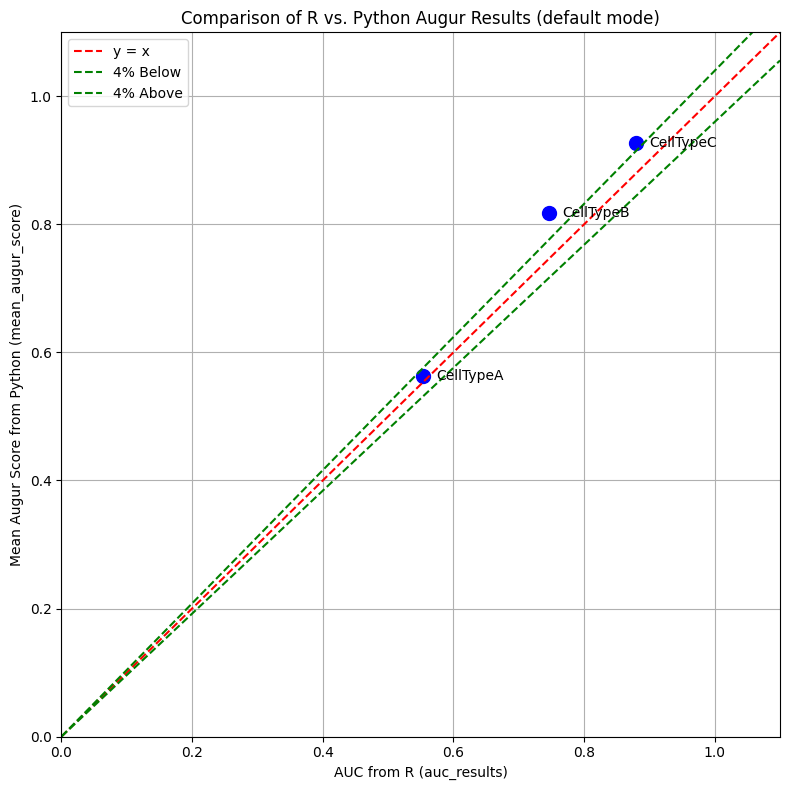

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pertpy as pt

# 1. Load the R-based AUC results (CSV)
file_path = "data/augur_R_auc_results_default.csv"
auc_results = pd.read_csv(file_path)  # columns: [cell_type, auc]

print(auc_results)

# 2. Load & predict with Python-based Augur
adata = pt.dt.sc_sim_augur()
ag_rfc = pt.tl.Augur("random_forest_classifier")
loaded_data = ag_rfc.load(adata)

v_adata, v_results = ag_rfc.predict(
    loaded_data,
    subsample_size=20,
    n_threads=16,
    augur_mode='default'
)
print(v_results["summary_metrics"])

# 3. Extract Python mean_augur_score
summary_metrics = v_results["summary_metrics"]
py_scores = summary_metrics.loc["mean_augur_score"]  # row is "mean_augur_score"
py_scores_df = py_scores.reset_index()
py_scores_df.columns = ["cell_type", "python_score"]

# 4. Merge with R results by cell_type
merged_df = pd.merge(auc_results, py_scores_df, on="cell_type")

# 5. Plot the points
plt.figure(figsize=(8, 8))

plt.scatter(merged_df["auc"], merged_df["python_score"], s=100, color="blue")

for _, row in merged_df.iterrows():
    plt.text(row["auc"] + 0.02, row["python_score"], row["cell_type"],
             fontsize=10, verticalalignment='center')

# 6. Plot lines: y = x, y = 0.96x, y = 1.04x
x_vals = np.linspace(0, 1.1, 100)
plt.plot(x_vals, x_vals, ls="--", c="red", label="y = x")             # Diagonal
plt.plot(x_vals, 0.96 * x_vals, ls="--", c="green", label="4% Below") # 96% line
plt.plot(x_vals, 1.04 * x_vals, ls="--", c="green", label="4% Above") # 104% line

# 7. Adjust axis limits
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)

plt.xlabel("AUC from R (auc_results)")
plt.ylabel("Mean Augur Score from Python (mean_augur_score)")
plt.title("Comparison of R vs. Python Augur Results (default mode)")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
